In [1]:
import zipfile
path = zipfile.ZipFile("/content/License Plate Recognition.v6i.yolov11.zip")

In [2]:
path.extractall()

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.2 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
pre_train = YOLO("yolo11n.pt")

In [6]:
pre_train.train(data = "/content/data.yaml", epochs = 25)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac764b6a4e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
pre_train.save("best.pt")

In [8]:
model_save = YOLO("/content/best.pt")

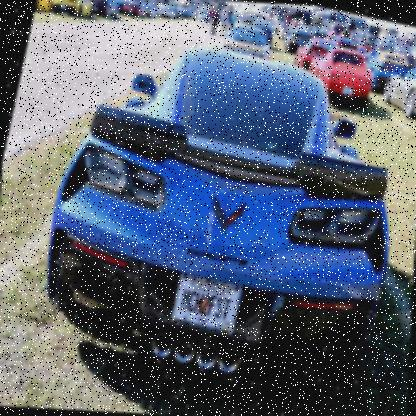

In [9]:
from IPython.display import Image
Image("/content/train/images/021620_142_jpeg_jpg.rf.34974c20dd467675aca934fc58d388d4.jpg")

In [10]:
pred = model_save.predict("/content/train/images/090619_104_jpeg_jpg.rf.11401605175516b98cd86cd594621856.jpg")


image 1/1 /content/train/images/090619_104_jpeg_jpg.rf.11401605175516b98cd86cd594621856.jpg: 640x640 1 License-Plate, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


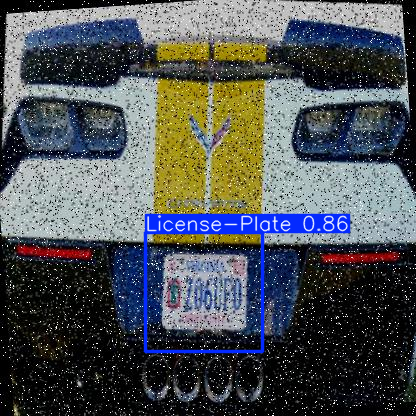

In [11]:
pred [0].show()

In [12]:
pred = model_save.predict("/content/train/images/021620_109_jpeg_jpg.rf.477a2b8f7b8e541abb713378b833557f.jpg")


image 1/1 /content/train/images/021620_109_jpeg_jpg.rf.477a2b8f7b8e541abb713378b833557f.jpg: 640x640 1 License-Plate, 12.0ms
Speed: 3.4ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


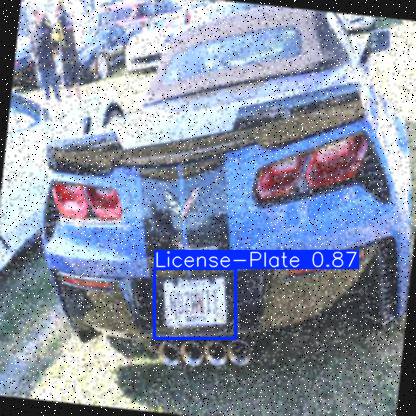

In [13]:
pred[0].show()

In [14]:
pred = model_save.predict("/content/train/images/hot-car_jpeg_jpg.rf.f005ccfbe11cc45bbbafd8f11549ae04.jpg")


image 1/1 /content/train/images/hot-car_jpeg_jpg.rf.f005ccfbe11cc45bbbafd8f11549ae04.jpg: 640x640 2 License-Plates, 11.1ms
Speed: 3.7ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


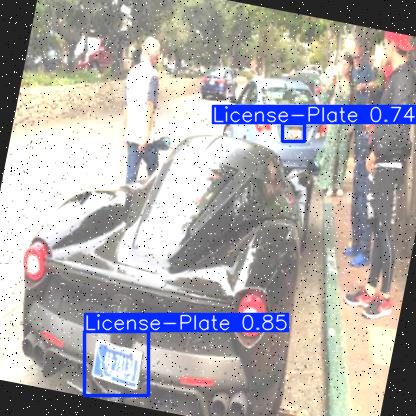

In [15]:
pred[0].show()

In [16]:
pred = model_save.predict("/content/train/images/800600001g3nmx7300_jpeg_jpg.rf.fc8e2b187812f2f686d8d6fadb125b64.jpg")


image 1/1 /content/train/images/800600001g3nmx7300_jpeg_jpg.rf.fc8e2b187812f2f686d8d6fadb125b64.jpg: 640x640 1 License-Plate, 10.8ms
Speed: 3.6ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


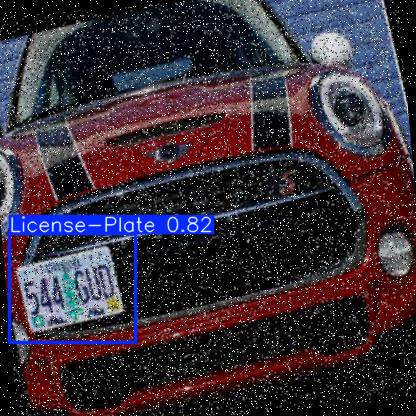

In [17]:
pred[0].show()

In [18]:
!pip install gradio

In [19]:
from PIL import Image
import gradio as gr
import numpy as np



In [20]:
def predict_image(img):
  results = model_save.predict(img)
  return results[0].plot()

In [21]:
iface = gr.Interface(fn=predict_image, inputs="image", outputs="image")
iface.launch(show_error=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://81c581d0386aa5df52.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [22]:
from IPython.display import Video
Video("/content/WhatsApp Video 2025-12-23 at 8.13.42 PM.mp4")

In [23]:
model_save.predict("/content/WhatsApp Video 2025-12-23 at 8.13.42 PM.mp4", save=True)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/635) /content/WhatsApp Video 2025-12-23 at 8.13.42 PM.mp4: 384x640 2 License-Plates, 93.6ms
video 1/1 (frame 2/635) /content/WhatsApp Video 2025-12-23 at 8.13.42 PM.mp4: 384x640 2 License-Plates, 14.5ms
video 1/1 (frame 3/635) /content/WhatsApp Video 2025-12-23 at 8.13.42 PM.mp4: 384x640 3 License-Plates, 14.4ms
video 1/1 (frame 4/635) /content/WhatsApp Video 2025-12-23 at 8.13.42 PM.mp4: 384x640 3 License-Plates, 20.8ms
video 1/1 (fra

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'License-Plate'}
 obb: None
 orig_img: array([[[110,  79,  60],
         [110,  79,  60],
         [116,  78,  60],
         ...,
         [243, 243, 243],
         [243, 243, 243],
         [243, 243, 243]],
 
        [[110,  79,  60],
         [110,  79,  60],
         [116,  78,  60],
         ...,
         [243, 243, 243],
         [243, 243, 243],
         [243, 243, 243]],
 
        [[104,  80,  60],
         [104,  80,  60],
         [110,  79,  60],
         ...,
         [243, 243, 243],
         [243, 243, 243],
         [243, 243, 243]],
 
        ...,
 
        [[112, 113, 118],
         [112, 113, 118],
         [112, 113, 118],
         ...,
         [100,  99, 101],
         [100,  99, 101],
         [101, 100, 102]],
 
        [[113, 114, 119],
         [113, 114, 119],
         [111, 112, 117],
         ...,
         [1